# SCM_PDA

## Analyse the on-time deliveries and evaluate the reason for misses. This helps in defining and monitoring service metrics,  identifying the improvement areas in dispatch process and build strategies around those areas to minimize the misses 


In [18]:
#loading the required libraries

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load and analyze data

### Data has been collected on the below mentioned points
Order Management system Data<br>
Customer Demographic Info<br>
Dispatch System Data (Warehouse/Delivery Centre info)

#### Based on the dataset will try to predict whether a delivery done on the below mentioned parameters will be On-Time or Delayed


In [19]:
data_path = 'pda_final.csv'
pda = pd.read_csv(data_path)
pda.head()

,PROCESSING_TIME,PRODUCT_ID,QUANTITY_AVAILABLE_DEALER,QUANTITY_AVAILABLE_WAREHOUSE,CUST_CITY,CUST_STATE,DELIVERY_STATUS
0,10,312NE70,70,33,TULSA,OKLAHOMA,1
1,15,486SF30,29,3,SANTA BARBARA,CALIFORNIA,0
2,8,684NE10,7,45,SHERIDAN,NEW YORK,1
3,3,53425SE,14,22,CHN|XINJIANG PROVINCE|HA MI CITY|XINJIANG PROV...,CHN|XINJIANG PROVINCE,1
4,15,384CA65,1,50,PARK CITY,UTAH,0


In [20]:
#divide the dependent and independent variable
X = pda.iloc[:, 0:6].values
y = pda.iloc[:, 6].values
X,y

(array([[10, '312NE70', 70, 33, 'TULSA', 'OKLAHOMA'],
        [15, '486SF30', 29, 3, 'SANTA BARBARA', 'CALIFORNIA'],
        [8, '684NE10', 7, 45, 'SHERIDAN', 'NEW YORK'],
        ..., 
        [13, '654ME34', 39, 77, 'TIOGA', 'NORTH DAKOTA'],
        [14, '438INET', 17, 30, 'CORPUS CHRISTI', 'TEXAS'],
        [21, '342NE20', 68, 35, 'NAKNEK', 'ALASKA']], dtype=object),
 array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
        1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
        0, 

In [21]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:,1] = labelencoder_X.fit_transform(X[:,1].astype(str))
X[:,4] = labelencoder_X.fit_transform(X[:,4].astype(str))
X[:,5] = labelencoder_X.fit_transform(X[:,5])
X

array([[10, 35, 70, 33, 224, 75],
       [15, 64, 29, 3, 204, 23],
       [8, 96, 7, 45, 208, 70],
       ..., 
       [13, 91, 39, 77, 223, 71],
       [14, 56, 17, 30, 68, 90],
       [21, 40, 68, 35, 155, 5]], dtype=object)

In [22]:
#dividing test set and training set
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X[:,[0,1]],y,test_size = 0.25, random_state =0)
X_train,X_test,y_train,y_test

(array([[27, 86],
        [21, 55],
        [26, 24],
        [16, 42],
        [18, 93],
        [29, 56],
        [1, 104],
        [14, 33],
        [7, 23],
        [16, 98],
        [10, 94],
        [11, 73],
        [19, 41],
        [27, 108],
        [13, 84],
        [18, 47],
        [5, 23],
        [29, 58],
        [10, 67],
        [22, 24],
        [26, 62],
        [13, 53],
        [27, 66],
        [10, 111],
        [12, 70],
        [24, 97],
        [1, 63],
        [11, 30],
        [1, 58],
        [23, 17],
        [28, 95],
        [21, 40],
        [27, 55],
        [26, 78],
        [16, 29],
        [8, 70],
        [16, 54],
        [10, 103],
        [26, 52],
        [16, 22],
        [3, 71],
        [8, 94],
        [20, 69],
        [13, 109],
        [12, 73],
        [4, 43],
        [14, 6],
        [28, 69],
        [9, 86],
        [21, 77],
        [3, 93],
        [0, 47],
        [25, 78],
        [28, 91],
        [12, 50],
        [5, 102],


In [23]:
#Dimensionality Reduction
# Applying PCA

from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([ 0.93114597,  0.06885403])

## Once data is preprocessed, it has been fed to the predefined Machine Learning Algorithms to see the performance

In [65]:
# fitting Random Forest Classifier on training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators =10,criterion = 'entropy',random_state =0)
RF_ACC=plotConfusionMatrix(classifier,X_train,y_train,X_test)
accuracy_matrix = []
accuracy_matrix.append(RF_ACC)


# Fitting SVM model on training set
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state =0)
RF_ACC=plotConfusionMatrix(classifier,X_train,y_train,X_test)
accuracy_matrix.append(RF_ACC)


# Fitting Kernel SVM model on training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state =0)
RF_ACC=plotConfusionMatrix(classifier,X_train,y_train,X_test)
accuracy_matrix.append(RF_ACC)


# fitting Naive Bayes on training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
RF_ACC=plotConfusionMatrix(classifier,X_train,y_train,X_test)
accuracy_matrix.append(RF_ACC)


# fitting Linear Regression model on training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state =0)
RF_ACC=plotConfusionMatrix(classifier,X_train,y_train,X_test)
accuracy_matrix.append(RF_ACC)

v_model= ['RandomForestClassifier','SVM','KernelSVM','NaiveBayes','LogisticRegression']
acc_dict = dict(zip(v_model, accuracy_matrix))
print(acc_dict)


{'NaiveBayes': 0.59183673469387754, 'RandomForestClassifier': 0.59183673469387754, 'KernelSVM': 0.61224489795918369, 'SVM': 0.62244897959183676, 'LogisticRegression': 0.6428571428571429}


In [27]:
def plotConfusionMatrix(classifier,Xtrain,y_train,X_test):
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    from sklearn.metrics import confusion_matrix, accuracy_score
    Accuracy_Score = accuracy_score(y_test,y_pred)
    return Accuracy_Score
        

### After training the model on the training set, let's start predicting results from the test set and check the accuracy of different models

In [51]:
#prediction
y_pred = classifier.predict(X_test)
#confusion matrix
from sklearn.metrics import confusion_matrix

#Confusion Matrix for LogisticRegression Classifier
cm_RandomForestClassifier = confusion_matrix(y_test,y_pred)
cm_RandomForestClassifier

array([[24, 16],
       [19, 39]])

In [70]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
Accuracy_Score = accuracy_score(y_test,y_pred)
Precision_Score = precision_score(y_test,y_pred,  average="macro")

print('Average Accuracy: %0.2f +/- (%0.1f) %%' % (Accuracy_Score.mean()*100, Accuracy_Score.std()*100))
print('Average Precision: %0.2f +/- (%0.1f) %%' % (Precision_Score.mean()*100, Precision_Score.std()*100))



Average Accuracy: 64.29 +/- (0.0) %
Average Precision: 70.91 +/- (0.0) %


C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)


C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


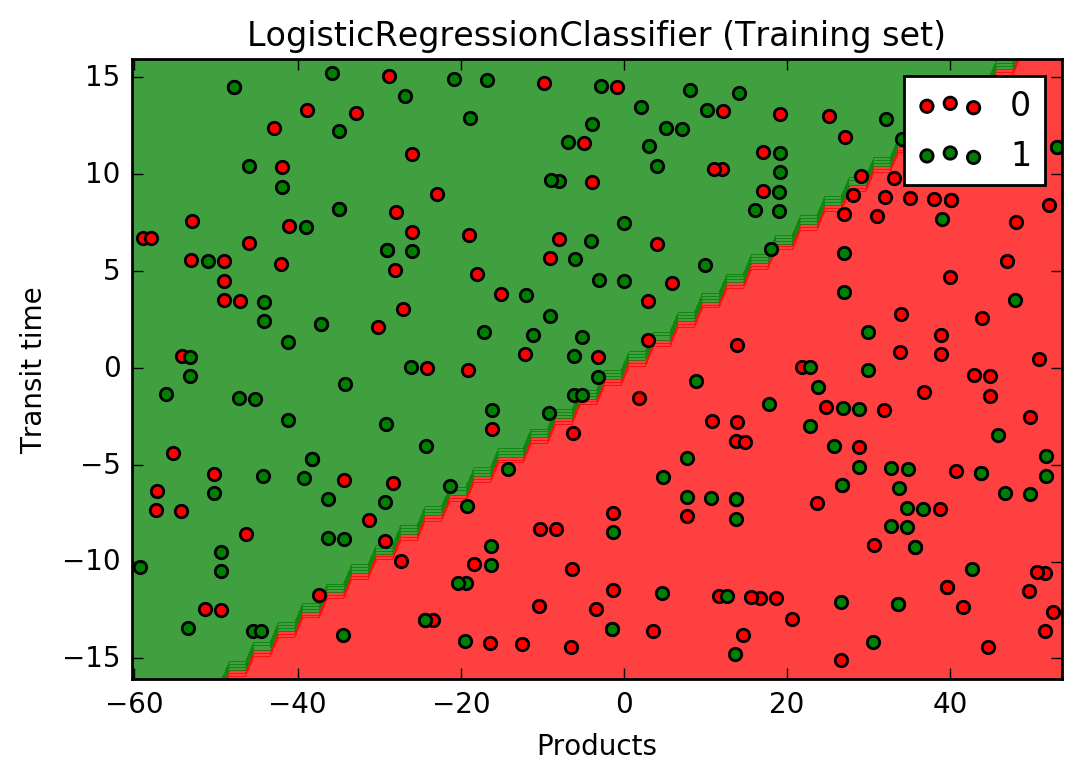

In [69]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 1))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('LogisticRegressionClassifier (Training set)')
plt.xlabel('Products')
plt.ylabel('Transit time')
plt.legend()
plt.show()

C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


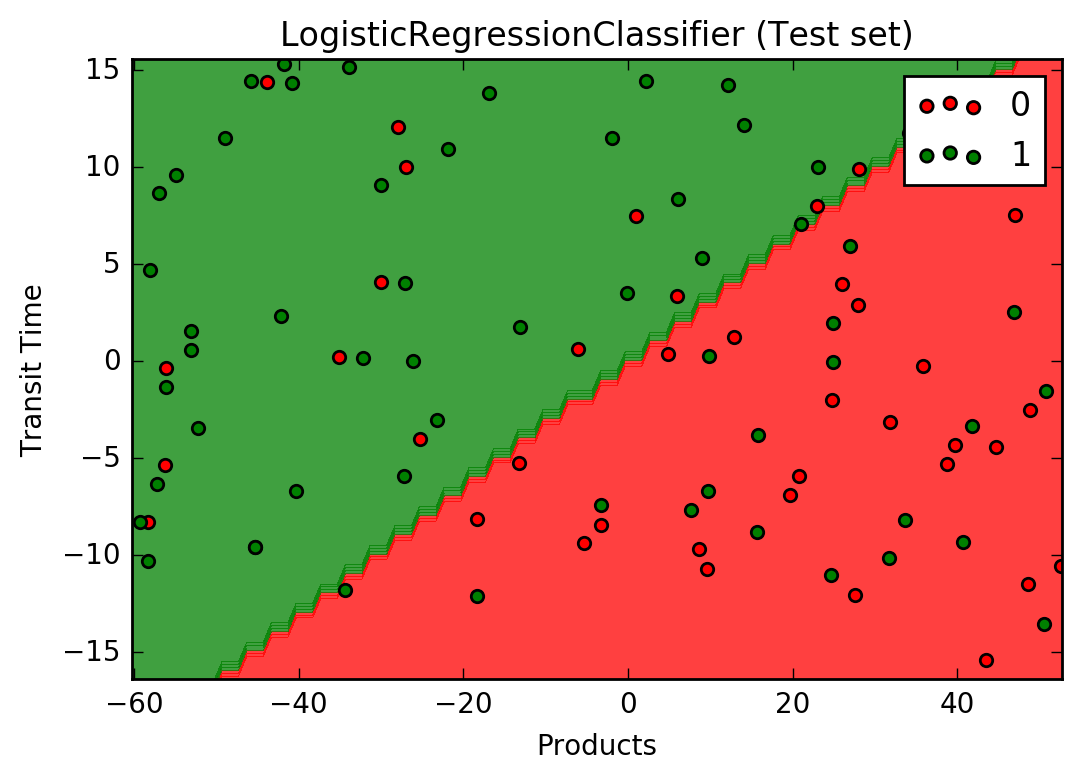

In [67]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 1))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('LogisticRegressionClassifier (Test set)')
plt.xlabel('Products')
plt.ylabel('Transit Time')
plt.legend()
plt.show()